In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
off_train_path = r'E:/DataSet/Tianchi/o2oSeason1/O2O_data/ccf_offline_stage1_train.csv'
off_test_path = r'E:/DataSet/Tianchi/o2oSeason1/O2O_data/ccf_offline_stage1_test_revised.csv'
on_train_path = r'E:/DataSet/Tianchi/o2oSeason1/O2O_data/ccf_online_stage1_train.csv'

off_train = pd.read_csv(off_train_path, keep_default_na=True)
off_train.columns = ['user_id', 'merchant_id', 'coupon_id', 'discount_rate', 'distance', 'date_received', 'date']

off_test = pd.read_csv(off_test_path, keep_default_na=True)
off_test.columns = ['user_id', 'merchant_id', 'coupon_id', 'discount_rate', 'distance', 'date_received']

on_train = pd.read_csv(on_train_path, keep_default_na=True)
on_train.columns = ['user_id', 'merchant_id', 'coupon_id', 'discount_rate', 'distance', 'date_received', 'date']

# 数据查看

In [3]:
off_train.head()

,user_id,merchant_id,coupon_id,discount_rate,distance,date_received,date
0,1439408,4663,11002.0,150:20,1.0,20160528.0,NaN
1,1439408,2632,8591.0,20:1,0.0,20160217.0,NaN
2,1439408,2632,1078.0,20:1,0.0,20160319.0,NaN
3,1439408,2632,8591.0,20:1,0.0,20160613.0,NaN
4,1439408,2632,NaN,NaN,0.0,NaN,20160516.0


In [4]:
off_test.head()

,user_id,merchant_id,coupon_id,discount_rate,distance,date_received
0,6949378,1300,3429,30:5,NaN,20160706
1,2166529,7113,6928,200:20,5.0,20160727
2,2166529,7113,1808,100:10,5.0,20160727
3,6172162,7605,6500,30:1,2.0,20160708
4,4005121,450,9983,30:5,0.0,20160706


In [5]:
on_train.head()

,user_id,merchant_id,coupon_id,discount_rate,distance,date_received,date
0,13740231,34805,1,NaN,NaN,NaN,20160321.0
1,14336199,18907,0,NaN,NaN,NaN,20160618.0
2,14336199,18907,0,NaN,NaN,NaN,20160618.0
3,14336199,18907,0,NaN,NaN,NaN,20160618.0
4,14336199,18907,0,NaN,NaN,NaN,20160618.0


In [6]:
off_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754883 entries, 0 to 1754882
Data columns (total 7 columns):
 #   Column         Dtype  
---  ------         -----  
 0   user_id        int64  
 1   merchant_id    int64  
 2   coupon_id      float64
 3   discount_rate  object 
 4   distance       float64
 5   date_received  float64
 6   date           float64
dtypes: float64(4), int64(2), object(1)
memory usage: 93.7+ MB


In [7]:
off_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113639 entries, 0 to 113638
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   user_id        113639 non-null  int64  
 1   merchant_id    113639 non-null  int64  
 2   coupon_id      113639 non-null  int64  
 3   discount_rate  113639 non-null  object 
 4   distance       101575 non-null  float64
 5   date_received  113639 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 5.2+ MB


In [8]:
on_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11429825 entries, 0 to 11429824
Data columns (total 7 columns):
 #   Column         Dtype  
---  ------         -----  
 0   user_id        int64  
 1   merchant_id    int64  
 2   coupon_id      int64  
 3   discount_rate  object 
 4   distance       object 
 5   date_received  float64
 6   date           float64
dtypes: float64(2), int64(3), object(2)
memory usage: 610.4+ MB


In [9]:
off_train.describe()

,user_id,merchant_id,coupon_id,distance,date_received,date
count,1.754883e+06,1.754883e+06,1.053282e+06,1.648880e+06,1.053282e+06,7.769830e+05
mean,3.689256e+06,4.038809e+03,6.815398e+03,2.361637e+00,2.016032e+07,2.016040e+07
std,2.123428e+06,2.435963e+03,4.174276e+03,3.483975e+00,1.771416e+02,1.621500e+02
min,4.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,2.016010e+07,2.016010e+07
25%,1.845052e+06,1.983000e+03,2.840000e+03,0.000000e+00,2.016013e+07,2.016031e+07
50%,3.694453e+06,3.532000e+03,7.430000e+03,0.000000e+00,2.016032e+07,2.016042e+07
75%,5.528759e+06,6.329000e+03,1.032300e+04,3.000000e+00,2.016051e+07,2.016052e+07
max,7.361032e+06,8.856000e+03,1.404500e+04,1.000000e+01,2.016062e+07,2.016063e+07


# 数据缺失情况

In [10]:
off_train.isnull().sum()

user_id               0
merchant_id           0
coupon_id        701601
discount_rate    701601
distance         106003
date_received    701601
date             977900
dtype: int64

In [11]:
off_test.isnull().sum()

user_id              0
merchant_id          0
coupon_id            0
discount_rate        0
distance         12064
date_received        0
dtype: int64

In [12]:
on_train.isnull().sum()

user_id                 0
merchant_id             0
coupon_id               0
discount_rate    10557469
distance         10557469
date_received    10557469
date               655897
dtype: int64

# 数据边界探索

In [13]:
print('offline train date_received')
print(off_train[off_train['date_received'] != 'null']['date_received'].min())
print(off_train[off_train['date_received'] != 'null']['date_received'].max())

print('online train date_received')
print(on_train[on_train['date_received'] != 'null']['date_received'].min())
print(on_train[on_train['date_received'] != 'null']['date_received'].max())

print('test date_received')
print(off_test['date_received'].min())
print(off_test['date_received'].max())

offline train date_received
20160101.0
20160615.0
online train date_received
20160101.0
20160615.0
test date_received
20160701
20160731


In [14]:
print('offline train date')
print(off_train[off_train['date'] != 'null']['date'].min())
print(off_train[off_train['date'] != 'null']['date'].max())

print('online train date')
print(on_train[on_train['date'] != 'null']['date'].min())
print(on_train[on_train['date'] != 'null']['date'].max())

offline train date
20160101.0
20160630.0
online train date
20160101.0
20160630.0


In [15]:
# 查看online和offline训练集的user_id与测试集的重合度
off_train_user = off_train[['user_id']].copy().drop_duplicates()
off_test_user = off_test[['user_id']].copy().drop_duplicates()
on_train_user = on_train[['user_id']].copy().drop_duplicates()
print('offline训练集用户ID数量')
print(off_train_user.user_id.count())
print('online训练集用户ID数量')
print(on_train_user.user_id.count())
print('offline测试集用户ID数量')
print(off_test_user.user_id.count())


offline训练集用户ID数量
539438
online训练集用户ID数量
762858
offline测试集用户ID数量
76308


In [16]:
off_train_user['off_train_flag'] = 1
off_merge = off_test_user.merge(off_train_user, on='user_id', how='left').reset_index().fillna(0)
print('offline 训练集用户与测试集用户的重复数量')
print(off_merge['off_train_flag'].sum())
print('offline 训练集用户与测试集重复用户在总测试集用户中的占比')
print(off_merge['off_train_flag'].sum() / off_merge['off_train_flag'].count())

on_train_user['on_train_flag'] = 1
on_merge = off_test_user.merge(on_train_user, on='user_id', how='left').reset_index().fillna(0)
print('online 训练集用户与测试集用户的重复数量')
print(on_merge['on_train_flag'].sum())
print('online 训练集用户与测试集重复用户在总测试集用户中的占比')
print(on_merge['on_train_flag'].sum() / on_merge['on_train_flag'].count())

offline 训练集用户与测试集用户的重复数量
76306.0
offline 训练集用户与测试集重复用户在总测试集用户中的占比
0.9999737904282644
online 训练集用户与测试集用户的重复数量
43155.0
online 训练集用户与测试集重复用户在总测试集用户中的占比
0.5655370341248624


In [17]:
#  查看online和offline训练集和merchant_id与测试集的重合度
off_train_merchant = off_train[['merchant_id']].copy().drop_duplicates()
off_test_merchant = off_test[['merchant_id']].copy().drop_duplicates()
on_train_merchant = on_train[['merchant_id']].copy().drop_duplicates()
print('offline 训练集商家ID数量')
print(off_train_merchant.merchant_id.count())
print('offline 测试集商家ID数量')
print(off_test_merchant.merchant_id.count())
print('online 训练集商家ID数量')
print(on_train_merchant.merchant_id.count())


off_train_merchant['off_train_flag'] = 1
off_merge = off_test_merchant.merge(off_train_merchant,
                                    on='merchant_id', how='left').reset_index().fillna(0)
print('offline 训练集商家与测试集商家的重复数量')
print(off_merge['off_train_flag'].sum())
print('offline 训练集与测试集重复商家在总测试集商家中的占比')
print(off_merge['off_train_flag'].sum() / off_merge['off_train_flag'].count())

on_train_merchant['on_train_flag'] = 1
on_merge = off_test_merchant.merge(on_train_merchant, 
                                   on='merchant_id', how='left').reset_index().fillna(0)
print('online 训练集商家与测试集商家的重复数量')
print(on_merge['on_train_flag'].sum())
print('online 训练集与测试集重复商家在总测试集商家中的占比')
print(on_merge['on_train_flag'].sum() / on_merge['on_train_flag'].count())


offline 训练集商家ID数量
8415
offline 测试集商家ID数量
1559
online 训练集商家ID数量
7999
offline 训练集商家与测试集商家的重复数量
1558.0
offline 训练集与测试集重复商家在总测试集商家中的占比
0.9993585631815266
online 训练集商家与测试集商家的重复数量
0.0
online 训练集与测试集重复商家在总测试集商家中的占比
0.0


In [18]:
# 查看oneline和offline训练集的coupon_id与测试集的重合度
off_train_coupon = off_train[['coupon_id']].copy().drop_duplicates()
off_test_coupon = off_test[['coupon_id']].copy().drop_duplicates()
on_train_coupon = on_train[['coupon_id']].copy().drop_duplicates()

print('offline 训练集优惠券数量')
print(off_train_coupon['coupon_id'].count())
print('offline 测试集集优惠券数量')
print(off_test_coupon['coupon_id'].count())
print('online 训练集优惠券数量')
print(on_train_coupon['coupon_id'].count())

off_train_coupon['off_train_flag'] = 1
off_merge = off_test_coupon.merge(off_train_coupon, 
                                  on='coupon_id', how='left').reset_index().fillna(0)
print('offline 训练集优惠券与测试集优惠券的重复数量')
print(off_merge['off_train_flag'].sum())
print('offline 训练集与测试集重复优惠券在总测试集优惠券中的占比')
print(off_merge['off_train_flag'].sum() / off_merge['off_train_flag'].count())


on_train_coupon['on_train_flag'] = 1
on_merge = off_test_coupon.merge(on_train_coupon, 
                                  on='coupon_id', how='left').reset_index().fillna(0)
print('offline 训练集优惠券与测试集优惠券的重复数量')
print(on_merge['on_train_flag'].sum())
print('offline 训练集与测试集重复优惠券在总测试集优惠券中的占比')
print(on_merge['on_train_flag'].sum() / on_merge['on_train_flag'].count())
# online 训练集和 offline 训练集在user_id , merchant_id, coupon_id重合度很低

offline 训练集优惠券数量
9738
offline 测试集集优惠券数量
2050
online 训练集优惠券数量
3
offline 训练集优惠券与测试集优惠券的重复数量
1118.0
offline 训练集与测试集重复优惠券在总测试集优惠券中的占比
0.5453658536585366
offline 训练集优惠券与测试集优惠券的重复数量
0.0
offline 训练集与测试集重复优惠券在总测试集优惠券中的占比
0.0


In [19]:
off_train['discount_rate'].value_counts()
# 需要统一转换成比例

30:5       270712
100:10     182554
200:20     111046
20:5        91013
20:1        51705
50:5        47379
100:30      38196
200:30      29327
300:30      28979
50:10       28452
10:5        25925
0.95        20568
10:1        17842
30:1        17654
150:20      17437
100:20      14297
30:10       12692
50:20        8203
0.9          8085
200:50       5585
150:10       5325
100:5        5053
0.8          3441
50:1         3354
5:1          2526
100:50       1774
150:30        654
0.85          649
200:10        575
100:1         537
20:10         514
150:50        306
300:50        206
0.5           186
0.75          121
0.2           110
0.6            58
200:5          57
300:20         56
0.7            54
30:20          24
300:10         23
200:100        12
50:30           9
150:5           7
Name: discount_rate, dtype: int64

In [20]:
off_test['discount_rate'].value_counts()

30:5       59317
20:1       11273
50:10       7476
20:5        7026
200:20      5496
30:1        4016
10:1        3758
100:10      3706
50:5        2693
100:20      2327
0.95         991
0.9          827
0.8          735
150:5        495
100:5        467
30:10        407
10:5         346
50:1         339
200:30       258
150:20       248
100:30       229
150:30       181
5:1          171
300:30       136
200:50       124
20:10        114
50:20         97
100:50        97
150:50        92
150:10        61
30:20         32
200:10        26
300:50        19
200:5         18
100:1         14
0.5           10
300:20        10
200:100        3
0.6            1
500:30         1
0.85           1
0.7            1
Name: discount_rate, dtype: int64

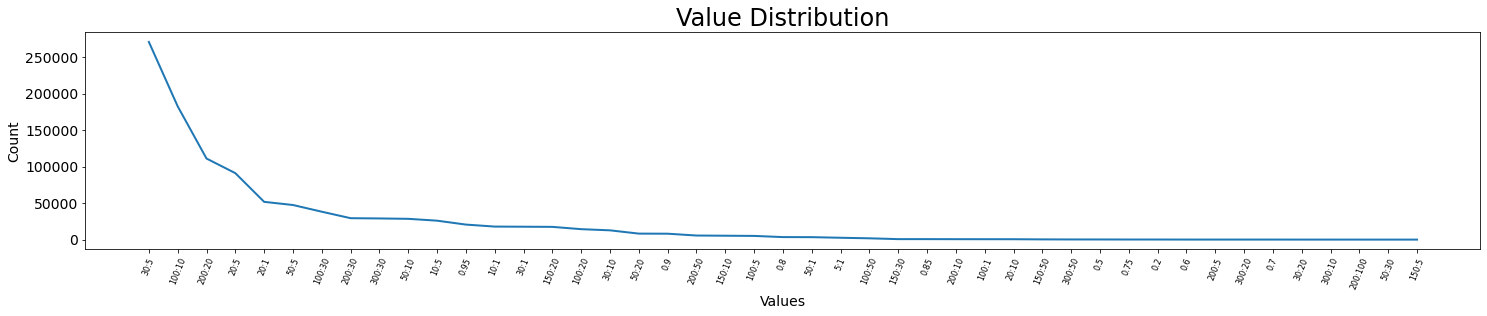

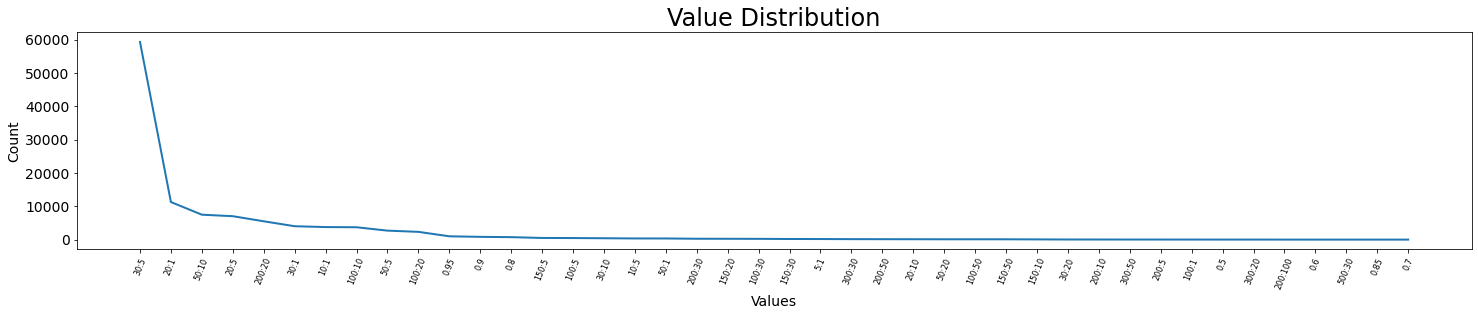

In [24]:
# 图片大小
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (25.0, 4.0)
plt.title('Value Distribution', fontsize=24)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Values', fontsize=14)
plt.tick_params(axis='both', labelsize=14)
plt.xticks(size='small', rotation=68, fontsize=8)
plt.plot(off_train['discount_rate'].value_counts(), linewidth=2)
plt.show()

plt.rcParams['figure.figsize'] = (25.0, 4.0)
plt.title('Value Distribution', fontsize=24)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Values', fontsize=14)
plt.tick_params(axis='both', labelsize=14)
plt.xticks(size='small', rotation=68, fontsize=8)
plt.plot(off_test['discount_rate'].value_counts(), linewidth=2)
plt.show()